


# Space X Falcon 9 First Stage Landing Prediction #

## Machine Learning Prediction ##


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. Here we will create a machine learning pipeline to predict if the first stage will land or not.




### Import Libraries and Define Auxiliary Functions ##

In [1]:


# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier




### Plot the confusion matrix for the project using function.

In [2]:

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); # annot = True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])



### Load the dataframe


In [3]:

data = pd.read_csv('/Users/taherehehsan/dataset_falcon9.csv')

data.head(100)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [4]:

data.iloc[0,1]


'2010-06-04'


## Preprocessing


In [5]:

preprocessed = pd.read_csv('/Users/taherehehsan/preprocessed_dataset.csv')

preprocessed.head(100)


,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,15400.000000,2,1,1,1,5.0,2,1,0,...,0,0,1,0,0,0,0,1,0,0
86,86,15400.000000,3,1,1,1,5.0,2,1,0,...,0,0,1,0,0,0,0,1,0,0
87,87,15400.000000,6,1,1,1,5.0,5,1,0,...,0,0,1,0,0,0,0,1,0,0
88,88,15400.000000,3,1,1,1,5.0,2,1,0,...,0,0,1,0,0,0,0,0,0,1


In [6]:

preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         


## Define X, Y


In [7]:

X = preprocessed.drop('Class', axis = 1)

Y = preprocessed['Class']



## By quickly examining the data, we can see that it needs to be standardized.
For instance, Payload Mass and Flights are measured on very different scales, which could lead to errors or bias in the model’s calculations.

Before applying standardization, let's compute the **mean** and **standard deviation**  
of key numerical features. These values will serve as a **reference** to compare  
how scaling affects the data later in the project.

In [8]:

X['PayloadMass'].mean()

np.float64(6104.959411764707)

In [9]:

X['PayloadMass'].std()

np.float64(4694.671719712727)

In [10]:

X['Flights'].mean()

np.float64(1.788888888888889)

In [11]:

X['Flights'].std()

np.float64(1.2131715741866367)

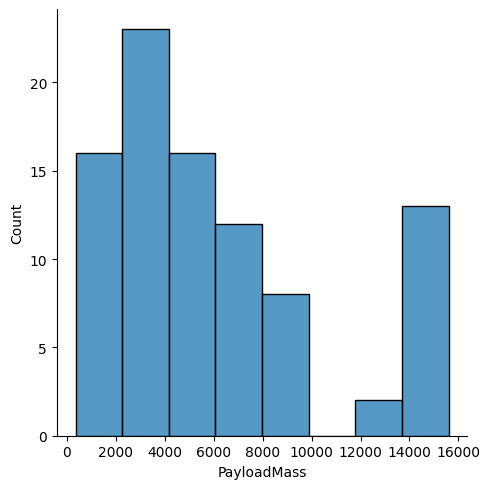

In [12]:

sns.displot(data=X, x="PayloadMass")



Since Payload Mass (≈1,000–10,000) and Flights (≈1–10) are on very different scales, standardizing them helps prevent bias and improves model performance.
    


## Standardize Features


In [13]:

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing


In [14]:

transform = preprocessing.StandardScaler()

x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.25356634e+00, -1.50755672e-01, -3.92232270e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
        -7.97724035e-01, -1.50755672e-01,  2.54950976e+00],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
         1.25356634e+00, -1.50755672e-01, -3.92232270e-01]],
      shape=(90, 35))


Turn this array into a Dataframe


In [15]:
col=X.columns

X = pd.DataFrame(x_scaled, columns=col)

X


,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
1,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
2,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
3,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.150756,-0.517306,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
4,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,1.253566,-0.150756,-0.392232
86,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,1.253566,-0.150756,-0.392232
87,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,1.253566,-0.150756,-0.392232
88,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,2.549510



## Comparing reference and Scaled values


In [16]:

X['PayloadMass'].mean()

np.float64(-1.4186183092432555e-16)

In [17]:

X['PayloadMass'].std()

np.float64(1.0056022847309865)

In [18]:
X['Flights'].mean()

np.float64(-7.278128716987137e-17)

In [19]:

X['Flights'].std()

np.float64(1.0056022847309865)

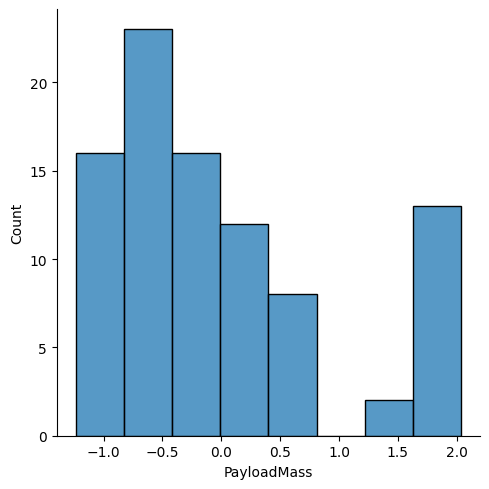

In [20]:

sns.displot(data=X, x="PayloadMass")


Standardized data are now at the same scale.

Mean is almost close to 0 and std close to 1.

Distribution is almost same only scale has changed.



## Train Test Split


In [21]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, 
                                                    random_state = 101)



## Logistic Regression


In [22]:

lr = LogisticRegression()

parameters = {'C': [0.01, 0.1, 1.1], 'penalty': ['l2'], 'solver': ['lbfgs']}

logreg_cv = GridSearchCV(lr, parameters, cv = 4 )

logreg_cv.fit(X_train, Y_train)


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [23]:

print('tuned hyperparameters : (best parameters)', logreg_cv.best_params_)

print('accuracy :', logreg_cv.best_score_)


tuned hyperparameters : (best parameters) {'C': 1.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9375



Calculate the accuracy on the test data using the method score

In [24]:

# Create List for collecting results

accu = []
methods = []

accu.append(logreg_cv.score(X_test, Y_test))
methods.append('logistic regression')

logreg_cv.score(X_test, Y_test)


0.9259259259259259


## Confusion Matrix


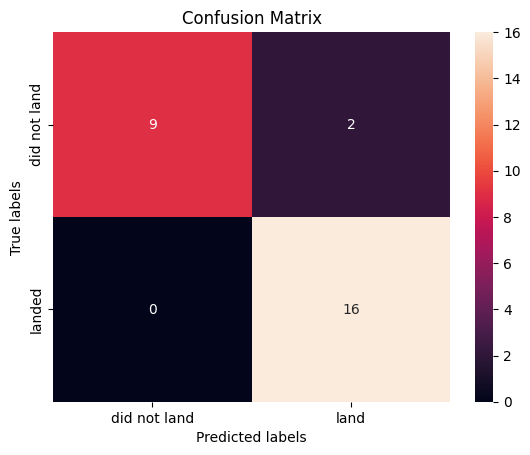

In [25]:

yhat = logreg_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)




## Support Vector Machine



In [26]:

svm = SVC()

parameters = {'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'), 
              'C': (0.5, 1, 1.5)}

svm_cv = GridSearchCV(svm, parameters, cv = 10)

svm_cv.fit(X_train, Y_train)


,estimator,SVC()
,param_grid,"{'C': (0.5, ...), 'kernel': ('linear', ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.5


In [27]:

print('tuned hyperparameters : (best parameters)', svm_cv.best_params_)

print('accuracy :', svm_cv.best_score_)


tuned hyperparameters : (best parameters) {'C': 0.5, 'kernel': 'linear'}
accuracy : 0.9833333333333334



 Calculate the accuracy on the test data using the method score:

In [28]:

accu.append(svm_cv.score(X_test, Y_test))
methods.append('Support Vector Machine')

svm_cv.score(X_test, Y_test)


1.0

## Confusion Matrix

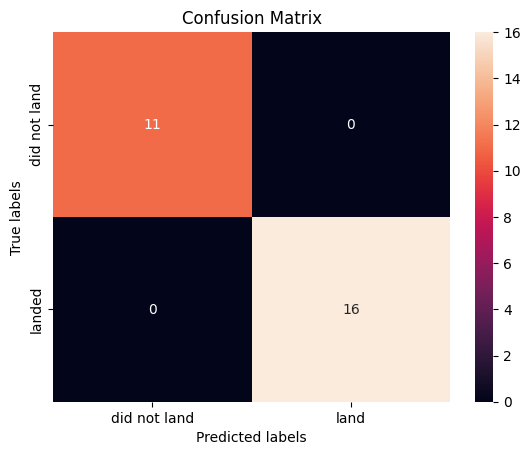

In [29]:

yhat = svm_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)



## Decision Trees


In [30]:

tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}


In [31]:

tree_cv = GridSearchCV(tree, parameters, cv = 10)

tree_cv.fit(X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [32]:

print('tuned hyperparameters : (best parameters)', tree_cv.best_params_)

print('accuracy :', tree_cv.best_score_)


tuned hyperparameters : (best parameters) {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9666666666666668


In [33]:

accu.append(tree_cv.score(X_test, Y_test))
methods.append('Decision Tree')

tree_cv.score(X_test, Y_test)


0.8518518518518519


### Confusion Matrix 

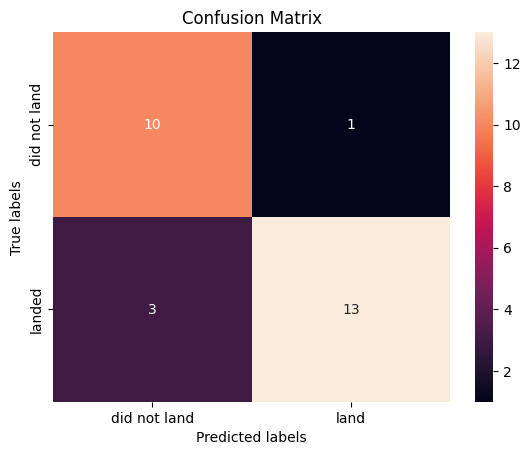

In [34]:

yhat = tree_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)




### K Nearest Neighbors

In [35]:

KNN = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}


In [36]:

knn_cv = GridSearchCV(KNN, parameters, cv = 10)

knn_cv.fit(X_train, Y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [1, 2, ...], 'p': [1, 2]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [37]:

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

print("accuracy :",knn_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.9238095238095239


In [38]:

accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')

knn_cv.score(X_test,Y_test)


0.8888888888888888



### Confusion Matrix

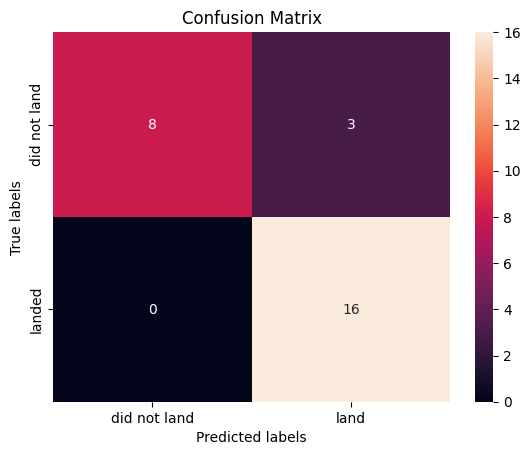

In [39]:

yhat = knn_cv.predict(X_test)

plot_confusion_matrix(Y_test,yhat)




### Find the method performs best:


In [40]:

print(methods)

print(accu)


['logistic regression', 'Support Vector Machine', 'Decision Tree', 'k nearest neighbors']
[0.9259259259259259, 1.0, 0.8518518518518519, 0.8888888888888888]


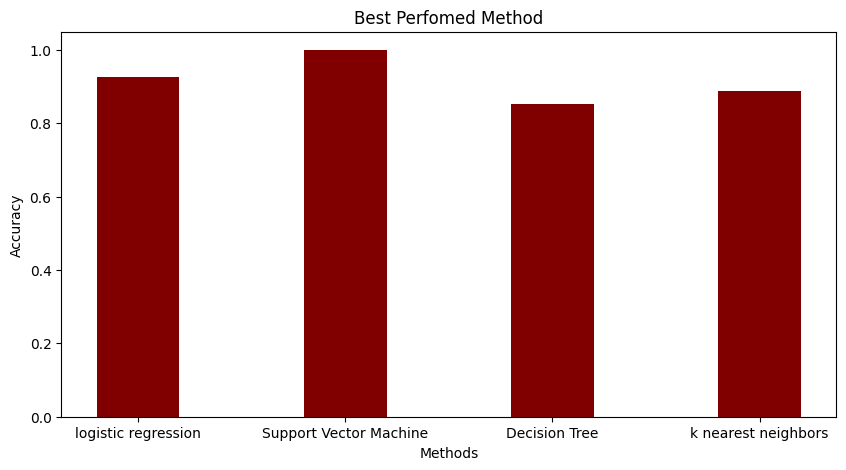

In [41]:

fig = plt.figure(figsize = (10, 5))

# Creating the Bar plot
plt.bar(methods, accu, color ='maroon',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()


Support Vector Machine model has the highest accuracy


### SAVE-LOAD the trained model using pickle

In [42]:

import pickle


In [43]:

# Save

with open('model.pkl','wb') as f:
    pickle.dump(logreg_cv,f)


print("Model saved successfully!")


Model saved successfully!



### Receiver Operating Characteristic Curve (ROC Curve)

In [44]:

## ROC Curve in Sklearn

from sklearn.metrics import RocCurveDisplay


Text(0.5, 1.0, 'Area Under ROC')

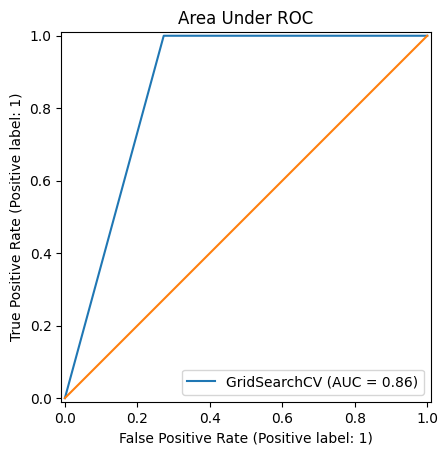

In [45]:

RocCurveDisplay.from_estimator(knn_cv, X_test, Y_test)

plt.plot([0,1], [0,1])
plt.title('Area Under ROC')



### Imbalanced Data

<Axes: xlabel='Class', ylabel='count'>

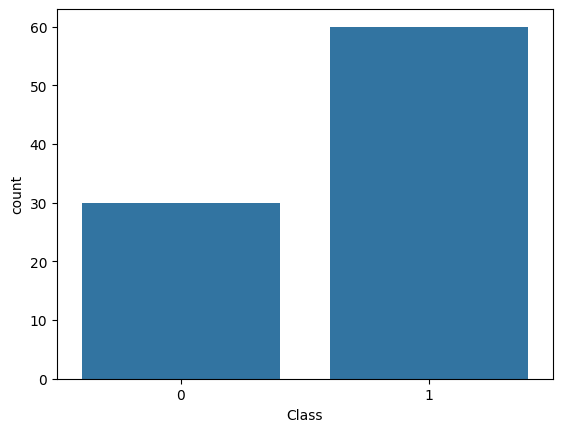

In [47]:

sns.countplot( x = 'Class', data = data)


Although we know that there is an imbalanced data problem, since IBM did not consider it, we can ignore it for now.